In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
from helper_fn import data_import, relabel

In [2]:
from tensorflow.keras.models import load_model

In [3]:
test_path='./Group_10/test'
train_path='./Group_10/train'
val_path='./Group_10/val'

#import datasets
train_data, train_labels = data_import(train_path)
test_data, test_labels = data_import(test_path)
val_data, val_labels = data_import(val_path)

train_data = train_data.reshape(-1, 784)/255.0
test_data = test_data.reshape(-1, 784)/255.0
val_data = val_data.reshape(-1, 784)/255.0

train_labels = relabel(train_labels)
test_labels = relabel(test_labels)
val_labels = relabel(val_labels)

mean_vec = np.mean(train_data, axis=0) # 784 dimentional vector
# print(mean_vec.shape) 

# mean correction
train_data = train_data - mean_vec
test_data = test_data - mean_vec
val_data = val_data - mean_vec

# PCA Task1

In [11]:
with open("./pca_models/pca32.pkl", mode="rb") as f:
    pca32 = pickle.load(f)

reduced_train = pca32.transform(train_data)
reduced_test = pca32.transform(test_data)
reduced_val = pca32.transform(val_data)

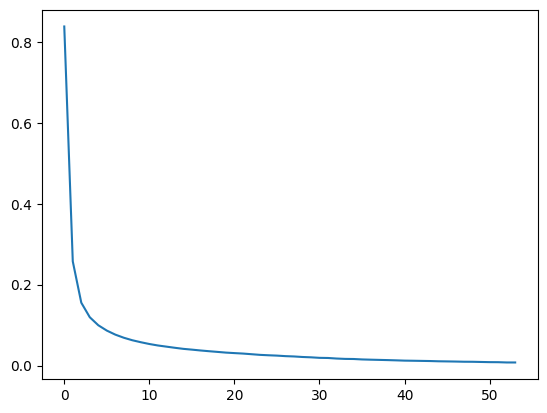

In [18]:
with open("./pca_models/history1_pca32.pkl", mode="rb") as f:
    history = pickle.load(f)

plt.plot(history['loss'])

In [14]:
model = load_model("./pca_models/pcamodel1_32.h5")
model.summary()
print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))



Model: "Model-PCA32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 32)]              0         
                                                                 
 Layer1 (Dense)              (None, 16)                528       
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________
Train data eval:
356/356 [==============================] - 0s 254us/step - loss: 0.0068 - accuracy: 0.9987
[0.006802352145314217, 0.9986824989318848]
Test data eval:
119/119 [=============

In [15]:
model = load_model("./pca_models/pcamodel2_32.h5")
model.summary()
print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))


Model: "Model-PCA32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 32)]              0         
                                                                 
 Layer1 (Dense)              (None, 256)               8448      
                                                                 
 Layer2 (Dense)              (None, 128)               32896     
                                                                 
 Layer3 (Dense)              (None, 64)                8256      
                                                                 
 Layer4 (Dense)              (None, 32)                2080      
                                                                 
 Output (Dense)              (None, 5)                 165       
                                                                 
Total params: 51,845
Trainable params: 51,845
Non-train

## 64 PCA

In [6]:
with open("./pca_models/pca64.pkl", mode="rb") as f:
    pca64 = pickle.load(f)

reduced_train = pca64.transform(train_data)
reduced_test = pca64.transform(test_data)
reduced_val = pca64.transform(val_data)

In [7]:
model = load_model("./pca_models/pcamodel1_64.h5")
model.summary()
print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))



Model: "Model-PCA64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 64)]              0         
                                                                 
 Layer1 (Dense)              (None, 16)                1040      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________
Train data eval:
356/356 [==============================] - 0s 255us/step - loss: 0.0059 - accuracy: 0.9989
[0.005892763379961252, 0.9989460110664368]
Test data eval:
119/119 [=========

## 128 PCA

In [8]:
with open("./pca_models/pca128.pkl", mode="rb") as f:
    pca128 = pickle.load(f)

reduced_train = pca128.transform(train_data)
reduced_test = pca128.transform(test_data)
reduced_val = pca128.transform(val_data)

In [9]:
model = load_model("./pca_models/pcamodel1_128.h5")
model.summary()

print("Train data eval:")
print(model.evaluate(reduced_train, train_labels))

print("Test data eval:")
print(model.evaluate(reduced_test, test_labels))

print("Val data eval:")
print(model.evaluate(reduced_val, val_labels))


Model: "Model-PCA128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 128)]             0         
                                                                 
 Layer1 (Dense)              (None, 16)                2064      
                                                                 
 Layer2 (Dense)              (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 5)                 45        
                                                                 
Total params: 2,245
Trainable params: 2,245
Non-trainable params: 0
_________________________________________________________________
Train data eval:
356/356 [==============================] - 0s 418us/step - loss: 0.0014 - accuracy: 0.9998
[0.0014380599604919553, 0.9998243451118469]
Test data eval:
119/119 [=======

# Autoencoders

## One layer 32 bottleneck

In [19]:
model = load_model("./autoencoder_models/autoencoder_1layer_32.h5")
model.summary()

Model: "Autoencoder32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder-input (InputLayer)  [(None, 784)]             0         
                                                                 
 Bottleneck-layer (Dense)    (None, 32)                25120     
                                                                 
 Decoder-output (Dense)      (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [22]:
class1 = train_data[0, :]
class2 = train_data[2277, :]
class3 = train_data[2*2277, :]
class4 = train_data[3*2277, :]
class5 = train_data[4*2277, :]

1/1 [==============================] - 0s 10ms/step


(-0.5, 27.5, 27.5, -0.5)

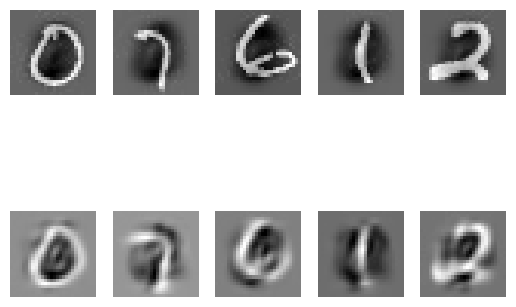

In [29]:
plt.figure()
plt.subplot(2,5,1)
# plt.title("Original")
plt.imshow(class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(class5.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,6)
# plt.title("Original")
recon_class1 = model.predict(class1.reshape((1, -1)))
plt.imshow(recon_class1.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,7)
recon_class2 = model.predict(class2.reshape((1, -1)))
plt.imshow(recon_class2.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,8)
recon_class3 = model.predict(class3.reshape((1, -1)))
plt.imshow(recon_class3.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,9)
recon_class4 = model.predict(class4.reshape((1, -1)))
plt.imshow(recon_class4.reshape((28,28)))
plt.axis('off')

plt.subplot(2,5,10)
recon_class5 = model.predict(class5.reshape((1, -1)))
plt.imshow(recon_class5.reshape((28,28)), cmap='gray')
plt.axis('off')